In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [17]:
class ODEsolver(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")

    @property
    def metrics(self):
        return [self.loss_tracker]

    def train_step(self, data):
        batch_size = tf.shape(data)[0]
        x = tf.random.uniform((batch_size, 1), minval=0, maxval=5)  
        x_0 = tf.zeros((batch_size,1))
        
        with tf.GradientTape() as tape:
            # Cálculo de la pérdida y los gradientes
            with tf.GradientTape(persistent=True) as g:
                g.watch(x)
                g.watch(x_0)

                with tf.GradientTape() as gg:
                    gg.watch(x)    
                    y_pred = self(x, training=True)
                y_x = gg.gradient(y_pred, x)
                y_0 = self(x_0, training=True)

            ddy = g.gradient(y_x, x)
            dy_x0 = g.gradient(y_0, x_0)
            eq = ddy +  4*y_pred  # Ajuste de la ecuación diferencial
            ic = y_0 - 5.0  # Ajuste de la condición inicial y(0)
            ic1 = dy_x0  # Ajuste de la condición inicial y'(0)
            loss = keras.losses.mean_squared_error(0., eq) + keras.losses.mean_squared_error(0., ic) + keras.losses.mean_squared_error(0., ic1)

        # Aplicar gradientes
        grads = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        # Actualizar métricas
        self.loss_tracker.update_state(loss)
        # Devolver un diccionario que mapea nombres de métricas a valores actuales
        return {"loss": self.loss_tracker.result()}

In [18]:
model = ODEsolver()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))

model.add(Dense(1, activation='linear'))

In [19]:
model.summary()

Model: "od_esolver_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_102 (Dense)               │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,131 (4.42 KB)

 Trainable params: 1,131 (4.42 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer=RMSprop(), metrics=['loss'])

x = tf.linspace(0, 5, 300)  # Ajusta el rango de tiempo
history = model.fit(x, epochs=300, verbose=1)

x_testv = tf.linspace(0, 5 , 300)  # Ajusta el rango de tiempo
a = model.predict(x_testv)

Epoch 1/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - loss: 3.4553
Epoch 2/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2919
Epoch 3/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9209  
Epoch 4/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6321 
Epoch 5/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9555  
Epoch 6/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4857 
Epoch 7/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6437 
Epoch 8/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5345 
Epoch 9/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9685  
Epoch 10/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5387  
Epoch 11/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6541 
Epoch 12/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6468  
Epoch 13/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3037  
Epoch 14/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0455 
Epoch 15/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/ste

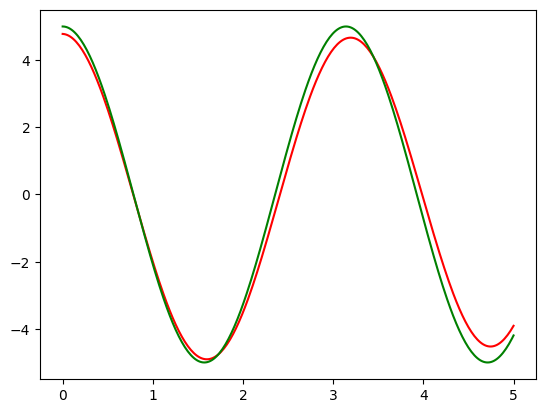

In [27]:
plt.plot(x_testv, a, color='red')
plt.plot(x_testv,5 * np.cos(2*x), color= 'green')
plt.show()